In [6]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline
import plotly.express as px

In [7]:
# Use the Pathlib libary to set the path to the CSV
evict_path = Path('../data/cleandata/eviction_data.csv')
flood_100_path = Path('../data/cleandata/flood_100yr_clean.csv')
food_path = Path('../data/cleandata/food_desert.csv')
road_path = Path('../data/cleandata/road_flooding_imelda.csv')
school_path = Path('../data/cleandata/school_ratings_data.csv')
svi_path = Path('../data/cleandata/svi_index.csv')

In [8]:
# Use the Pathlib libary to set the path to the CSV
#index_col='FIPS'
eviction_df = pd.read_csv(evict_path)
flood_df = pd.read_csv(flood_100_path)
food_df = pd.read_csv(food_path)
road_df = pd.read_csv(road_path)
school_df = pd.read_csv(school_path)
svi_df = pd.read_csv(svi_path)

In [9]:
flood_df.shape

(782, 2)

In [11]:
eviction2016_df = eviction_df[eviction_df['year'] == 2016]
eviction2016_df.shape

(762, 8)

In [115]:
result = df1.combine_first(df2)
merge1 = pd.merge(eviction2016_df, flood_df, left_on="FIPS", right_on="FIPS")
merge1.shape

(746, 16)

In [106]:
#food_df.reset_index(inplace=True)
food_df = food_df.rename(columns={'CensusTract':'FIPS'})

In [113]:
merge2 = pd.merge(food_df, school_df, left_on="FIPS", right_on="FIPS")
merge2 = merge2.drop(columns=['level_0', 'index'])
merge2.shape

(366, 17)

In [94]:
full_dataset = pd.concat([eviction2016_df, flood_df, food_df, road_df, school_df, svi_df], sort=False)
full_dataset
#list(full_dataset)

,year,name,parent-location,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,Street,Zip,City,Rating,FIPS,Socioeconomic,Housing - Disability,Minority Status - Language,Housing - Transportation,SVI INDEX
48201100000,2016.0,1000.0,"Harris County, Texas",4366.0,1.69,1554.0,81.15,1483.0,82004.0,229700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48201210400,2016.0,2104.0,"Harris County, Texas",4825.0,33.75,1050.0,60.98,620.0,23456.0,116900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48201210500,2016.0,2105.0,"Harris County, Texas",6061.0,31.28,941.0,65.67,700.0,30996.0,110600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48201210600,2016.0,2106.0,"Harris County, Texas",5391.0,14.30,899.0,42.98,859.0,48026.0,159200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48201210700,2016.0,2107.0,"Harris County, Texas",2176.0,31.80,378.0,40.20,849.0,24458.0,88500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.820153e+10,0.9062,0.6827,0.9060,1.0000,0.9896
782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.820153e+10,0.3837,0.0858,0.7840,0.9305,0.5708
783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.820153e+10,0.5494,0.6200,0.7344,0.9426,0.7658
784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.820156e+10,0.2547,0.6685,0.4627,0.7359,0.4914


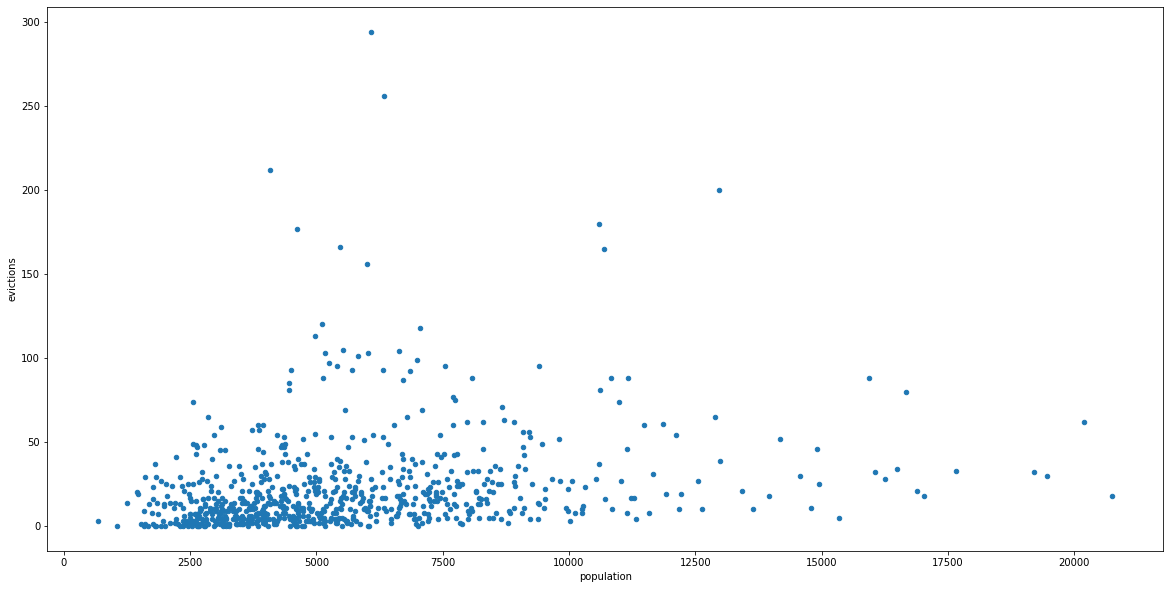

In [70]:
eviction2016_df = eviction_df[eviction_df['year'] == 2016]
eviction2016_df.head()
ax1 = eviction2016_df.plot.scatter(x='population',
                                y='evictions',
                                 figsize = (20,10))

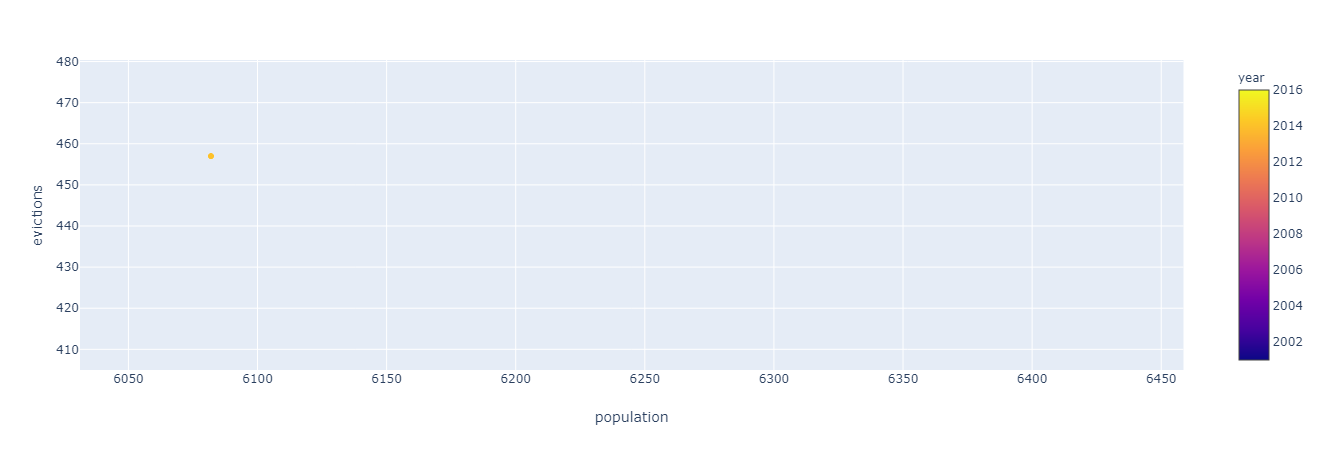

In [71]:
ax2 = px.scatter(eviction_df, x= "population", y = "evictions", color = "year")
ax2.show()

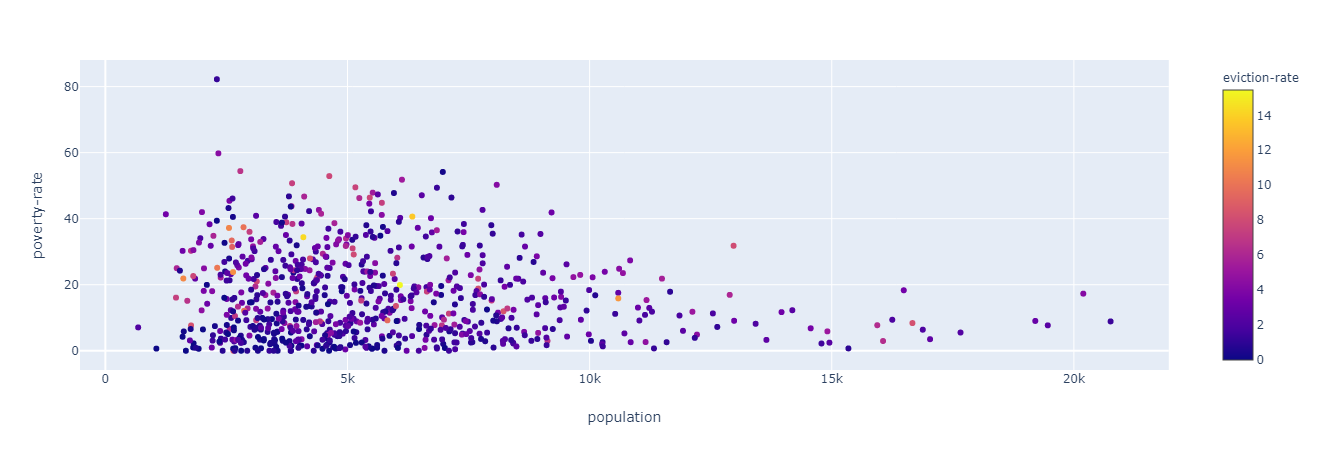

In [72]:
ax3 = px.scatter(eviction2016_df, x= "population", y = "poverty-rate", color = "eviction-rate")
ax3.show()

In [92]:
full_dataset['Rating'].isna().count()

3505

In [93]:
full_dataset.shape

(3505, 41)

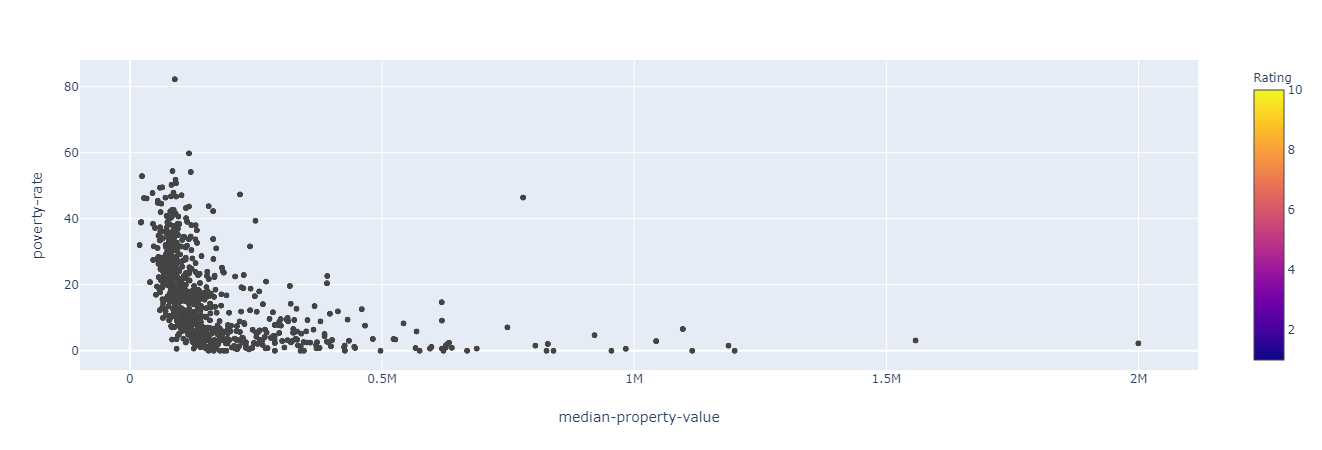

In [78]:
ax4 = px.scatter(full_dataset, x= "median-property-value", y = "poverty-rate", color = "Rating")
ax4.show()